# MAFS5370 Assignment 1 Sample Notebook

This notebook is used to demonstrate our approach to solve MAFS5370 assignment 1 with some examples of how to use assetAllocationDDPG class implemented. 

In [1]:
# Import necessary libraries

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import warnings
warnings.filterwarnings('ignore')

from assetAllocationDDPG import assetAllocationDDPG

In [2]:
# Set the parameters
initial_wealth = 1
p = 0.5
a = 1.2
b = 0.8
risk_free = 1
T = 10

In [3]:
# Initialize the problem
asset_allocation = assetAllocationDDPG(initial_wealth, p, a, b, risk_free, T)

# Run asset allocation to solve the problem
asset_allocation.asset_allocation_ddpg()

# Output action and Q value
# Using default window size which is 100 now
action, q_value = asset_allocation.output()

Iteration 9: 100%|███████████████████████████████████████| 100/100 [00:21<00:00,  4.70it/s, episode=1000, return=0.632]


step
step 0    0.022664
step 1    0.020617
step 2    0.012842
step 3    0.021633
step 4    0.020607
step 5    0.019197
step 6    0.019980
step 7    0.020442
step 8    0.022382
step 9    0.023633
dtype: float64
Q value in T = 0    0.523397
Q value in T = 1    0.523511
Q value in T = 2    0.523584
Q value in T = 3    0.523897
Q value in T = 4    0.524547
Q value in T = 5    0.524773
Q value in T = 6    0.524786
Q value in T = 7    0.524558
Q value in T = 8    0.524016
Q value in T = 9    0.631413
dtype: float64


<hr style="border:2px solid gray">

### Here are some example of accessing various methods and data memebers of the class

#### Example 1: get full action list, utility, state, etc.

full action list, state, utility (reward) are saved in df_full dataframe, which can be accessed through the following. Note that this table include all episode, i.e. so it has 10 (number of periods) * 1000 (number of episodes) = 10000 rows

In [4]:
asset_allocation.df_full

,state,action,reward,next_state,done
step 0,1.000000,0.598565,0.000000,0.880287,False
step 1,0.880287,0.530864,0.000000,0.786824,False
step 2,0.786824,0.604857,0.000000,0.882008,False
step 3,0.882008,0.461986,0.000000,0.800513,False
step 4,0.800513,0.506102,0.000000,0.719484,False
...,...,...,...,...,...
step 5,1.002074,0.029643,0.000000,0.996133,False
step 6,0.996133,0.000000,0.000000,0.996133,False
step 7,0.996133,0.064073,0.000000,0.983368,False
step 8,0.983368,0.015823,0.000000,0.980256,False


#### Example 2: plot moving average of the final utility to visualize convergence

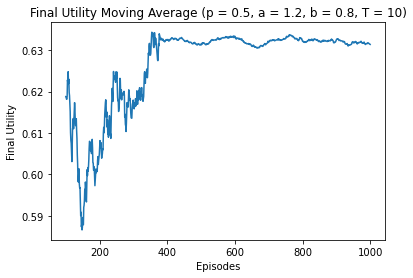

In [5]:
asset_allocation.plot_return_ma()

#### Example 3: get Q values table at each step

Below is an example of getting the Q values table for each step and all episodes

In [6]:
asset_allocation.df_q_value

,Q value in T = 0,Q value in T = 1,Q value in T = 2,Q value in T = 3,Q value in T = 4,Q value in T = 5,Q value in T = 6,Q value in T = 7,Q value in T = 8,Q value in T = 9
0,0.499924,0.477991,0.500282,0.481110,0.462741,0.444180,0.461406,0.478146,0.459102,0.466935
1,0.573415,0.525073,0.559642,0.516084,0.560798,0.520593,0.498506,0.474474,0.458163,0.530940
2,0.572394,0.620479,0.577455,0.615637,0.569637,0.611493,0.645239,0.686959,0.729285,0.828058
3,0.503654,0.481586,0.499776,0.516415,0.548404,0.516597,0.500764,0.518650,0.561263,0.622209
4,0.569189,0.610000,0.563442,0.606931,0.564569,0.517525,0.497401,0.479461,0.458952,0.538585
...,...,...,...,...,...,...,...,...,...,...
995,0.521764,0.521764,0.521764,0.519996,0.519996,0.519259,0.519259,0.520651,0.522319,0.631399
996,0.526845,0.530149,0.526914,0.535139,0.535139,0.543078,0.543078,0.543078,0.535086,0.635689
997,0.523294,0.523294,0.523294,0.521369,0.525833,0.524622,0.527490,0.527490,0.527490,0.635965
998,0.522997,0.522997,0.522997,0.521554,0.521554,0.521554,0.520102,0.517431,0.517431,0.621651
